In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
import time
import warnings
from bs4 import BeautifulSoup

warnings.filterwarnings("ignore")

In [58]:
url = "https://ev-database.org/"

In [59]:
response = requests.get(url)

In [60]:
response.status_code

200

In [61]:
pagecontent = response.text

In [62]:
soup = BeautifulSoup(pagecontent,'html.parser')

In [63]:
brand = []
model = []

for x in soup.find_all("a", attrs={"class": "title"}):
    br = x.find("span")                           # first <span> is always brand
    md = x.find("span", attrs={"class":"model"})  # model span

    brand.append(br.text.strip() if br else np.nan)
    model.append(md.text.strip() if md else np.nan)

In [64]:
range_km = []

for x in soup.find_all("span", attrs={"class": "erange_real"}):
    range_km.append(x.text.strip() if x else np.nan)

for r in range_km:
    print(r)

610 km
360 km
585 km
455 km
360 km
235 km
375 km
350 km
455 km
450 km
580 km
440 km
320 km
335 km
330 km
440 km
190 km
550 km
445 km
500 km
365 km
420 km
360 km
245 km
380 km
475 km
470 km
450 km
475 km
430 km
385 km
225 km
365 km
385 km
385 km
190 km
380 km
390 km
450 km
350 km
445 km
455 km
685 km
365 km
380 km
300 km
445 km
475 km
315 km
135 km
460 km
415 km
350 km
490 km
235 km
385 km
370 km
515 km
575 km
525 km
390 km
490 km
325 km
560 km
380 km
275 km
570 km
260 km
435 km
455 km
265 km
370 km
460 km
435 km
255 km
350 km
315 km
555 km
480 km
410 km
345 km
440 km
405 km
485 km
400 km
340 km
395 km
440 km
465 km
490 km
330 km
370 km
495 km
420 km
350 km
720 km
475 km
390 km
490 km
380 km
255 km
420 km
370 km
580 km
335 km
300 km
250 km
575 km
455 km
400 km
375 km
410 km
505 km
330 km
400 km
450 km
455 km
300 km
315 km
165 km
180 km
470 km
485 km
240 km
290 km
575 km
390 km
425 km
280 km
345 km
480 km
510 km
475 km
470 km
410 km
470 km
360 km
395 km
515 km
480 km
525 km
445 km
380 km

In [65]:
efficiency = []

for x in soup.find_all("span", attrs={"class": "efficiency"}):
    efficiency.append(x.text.strip() if x else np.nan)

for e in efficiency:
    print(e)

178 Wh/km
171 Wh/km
145 Wh/km
165 Wh/km
197 Wh/km
159 Wh/km
160 Wh/km
166 Wh/km
171 Wh/km
171 Wh/km
136 Wh/km
136 Wh/km
153 Wh/km
155 Wh/km
183 Wh/km
208 Wh/km
145 Wh/km
136 Wh/km
169 Wh/km
188 Wh/km
178 Wh/km
196 Wh/km
181 Wh/km
184 Wh/km
158 Wh/km
166 Wh/km
160 Wh/km
171 Wh/km
164 Wh/km
174 Wh/km
171 Wh/km
160 Wh/km
237 Wh/km
168 Wh/km
192 Wh/km
168 Wh/km
170 Wh/km
168 Wh/km
178 Wh/km
146 Wh/km
173 Wh/km
162 Wh/km
172 Wh/km
170 Wh/km
158 Wh/km
153 Wh/km
185 Wh/km
198 Wh/km
165 Wh/km
158 Wh/km
172 Wh/km
170 Wh/km
173 Wh/km
153 Wh/km
161 Wh/km
177 Wh/km
216 Wh/km
157 Wh/km
148 Wh/km
143 Wh/km
164 Wh/km
192 Wh/km
169 Wh/km
170 Wh/km
170 Wh/km
159 Wh/km
169 Wh/km
168 Wh/km
177 Wh/km
165 Wh/km
163 Wh/km
185 Wh/km
237 Wh/km
184 Wh/km
157 Wh/km
169 Wh/km
213 Wh/km
142 Wh/km
181 Wh/km
180 Wh/km
165 Wh/km
182 Wh/km
189 Wh/km
155 Wh/km
195 Wh/km
178 Wh/km
168 Wh/km
175 Wh/km
155 Wh/km
173 Wh/km
182 Wh/km
195 Wh/km
149 Wh/km
136 Wh/km
183 Wh/km
163 Wh/km
162 Wh/km
166 Wh/km
155 Wh/km
216 Wh/km


In [66]:
weight = []

for x in soup.find_all("span",attrs={"class":"weight_p"}):
    weight.append(x.text.strip() if x else np.nan)

for w in weight: 
    print(w)

2360 kg
1726 kg
2055 kg
2072 kg
2440 kg
1365 kg
2003 kg
1811 kg
1885 kg
1946 kg
1822 kg
1836 kg
1684 kg
1504 kg
1825 kg
2510 kg
1200 kg
1822 kg
2054 kg
2535 kg
1850 kg
2300 kg
1920 kg
1645 kg
1981 kg
2072 kg
1976 kg
2115 kg
1890 kg
2072 kg
2037 kg
1250 kg
2565 kg
1757 kg
2255 kg
1615 kg
2085 kg
1773 kg
2060 kg
1700 kg
2144 kg
1931 kg
2545 kg
1755 kg
1711 kg
1410 kg
2260 kg
2535 kg
1577 kg
1186 kg
2108 kg
2105 kg
1733 kg
1929 kg
1345 kg
2015 kg
2495 kg
2125 kg
2135 kg
1899 kg
1760 kg
2415 kg
1800 kg
2265 kg
1940 kg
1563 kg
2210 kg
1511 kg
2090 kg
1959 kg
1465 kg
1695 kg
2705 kg
2190 kg
1430 kg
1975 kg
2145 kg
1899 kg
1917 kg
1985 kg
1984 kg
2160 kg
2125 kg
1919 kg
2069 kg
1825 kg
2045 kg
2075 kg
1919 kg
2154 kg
1815 kg
1979 kg
1985 kg
1836 kg
1970 kg
2435 kg
2172 kg
1940 kg
1919 kg
2264 kg
1491 kg
2145 kg
1820 kg
2462 kg
1637 kg
1710 kg
1602 kg
2170 kg
1981 kg
1835 kg
1812 kg
2109 kg
2585 kg
1785 kg
2045 kg
2121 kg
2141 kg
1623 kg
1537 kg
1009 kg
1440 kg
1919 kg
2246 kg
1542 kg
1636 kg


In [67]:
acceleration = []

for x in soup.find_all("span", attrs={"class": "acceleration_p"}):
    acceleration.append(x.text.strip() if x else np.nan)

for a in acceleration:
    print(a)

4.9 sec
7.9 sec
6.7 sec
4.8 sec
6.1 sec
9.0 sec
5.9 sec
7.3 sec
7.7 sec
7.0 sec
5.2 sec
6.1 sec
5.6 sec
8.0 sec
7.3 sec
4.5 sec
12.1 sec
5.2 sec
5.0 sec
4.3 sec
5.3 sec
6.7 sec
8.0 sec
7.9 sec
7.2 sec
4.8 sec
5.6 sec
6.6 sec
7.7 sec
4.0 sec
7.6 sec
12.7 sec
5.7 sec
7.8 sec
6.8 sec
9.6 sec
5.6 sec
7.8 sec
7.5 sec
5.6 sec
6.7 sec
4.6 sec
6.2 sec
6.3 sec
7.4 sec
10.6 sec
3.8 sec
3.8 sec
11.4 sec
12.6 sec
3.8 sec
8.9 sec
7.0 sec
3.4 sec
7.3 sec
7.5 sec
5.1 sec
5.7 sec
4.9 sec
4.4 sec
7.9 sec
6.0 sec
7.5 sec
2.4 sec
8.6 sec
8.0 sec
4.9 sec
11.0 sec
6.4 sec
5.9 sec
9.1 sec
8.4 sec
4.9 sec
6.7 sec
12.5 sec
8.5 sec
10.6 sec
4.4 sec
7.9 sec
7.3 sec
6.9 sec
5.2 sec
8.5 sec
4.4 sec
8.4 sec
7.3 sec
8.6 sec
8.6 sec
4.4 sec
7.5 sec
6.9 sec
8.1 sec
7.4 sec
6.1 sec
7.5 sec
3.2 sec
6.5 sec
8.3 sec
4.4 sec
4.0 sec
11.5 sec
6.7 sec
5.5 sec
3.9 sec
7.7 sec
7.7 sec
9.7 sec
3.2 sec
7.6 sec
6.1 sec
7.8 sec
8.5 sec
4.6 sec
7.6 sec
7.5 sec
7.6 sec
6.7 sec
9.1 sec
8.2 sec
19.1 sec
7.3 sec
3.6 sec
8.8 sec
8.1 se

In [68]:
long_distance_range = []

for x in soup.find_all("span",class_="long_distance_total"):
    long_distance_range.append(x.text.strip() if x else np.nan)

for l in long_distance_range: 
    print(l)

742 km
405 km
763 km
535 km
388 km
261 km
438 km
375 km
472 km
488 km
688 km
520 km
389 km
348 km
325 km
502 km
193 km
655 km
524 km
606 km
411 km
440 km
403 km
235 km
440 km
556 km
552 km
493 km
498 km
506 km
453 km
212 km
384 km
365 km
411 km
178 km
407 km
391 km
560 km
421 km
490 km
560 km
731 km
387 km
410 km
311 km
472 km
614 km
274 km
92 km
535 km
414 km
338 km
585 km
222 km
448 km
366 km
584 km
746 km
629 km
363 km
630 km
341 km
636 km
405 km
312 km
730 km
270 km
452 km
535 km
275 km
352 km
444 km
559 km
254 km
405 km
328 km
654 km
481 km
514 km
409 km
549 km
430 km
577 km
421 km
348 km
405 km
468 km
534 km
531 km
365 km
368 km
637 km
495 km
384 km
836 km
541 km
418 km
584 km
405 km
270 km
460 km
399 km
698 km
325 km
306 km
230 km
653 km
484 km
468 km
349 km
436 km
538 km
350 km
493 km
445 km
477 km
324 km
326 km
151 km
183 km
555 km
492 km
256 km
318 km
699 km
363 km
418 km
299 km
423 km
507 km
564 km
536 km
552 km
439 km
535 km
352 km
394 km
603 km
574 km
595 km
490 km
386 km


In [69]:
battery_range = []

for x in soup.find_all("span",class_="battery_p"):
    battery_range.append(x.text.strip() if x else np.nan)

for b in battery_range: 
    print(b)

108.7 kWh
61.7 kWh
85.0 kWh
75.0 kWh
71.0 kWh
37.3 kWh
60.0 kWh
58.0 kWh
78.0 kWh
77.0 kWh
79.0 kWh
60.0 kWh
49.0 kWh
52.0 kWh
60.5 kWh
91.3 kWh
27.5 kWh
75.0 kWh
75.0 kWh
94.0 kWh
65.0 kWh
82.5 kWh
65.0 kWh
45.1 kWh
60.0 kWh
79.0 kWh
75.0 kWh
77.0 kWh
78.0 kWh
75.0 kWh
66.0 kWh
36.0 kWh
86.5 kWh
64.8 kWh
74.0 kWh
32.0 kWh
64.7 kWh
65.4 kWh
80.0 kWh
51.0 kWh
77.0 kWh
73.5 kWh
118.0 kWh
62.1 kWh
60.0 kWh
46.0 kWh
82.5 kWh
94.0 kWh
52.0 kWh
21.3 kWh
79.0 kWh
70.5 kWh
60.5 kWh
75.0 kWh
37.9 kWh
68.0 kWh
80.0 kWh
80.7 kWh
85.0 kWh
75.0 kWh
64.0 kWh
94.0 kWh
55.0 kWh
95.0 kWh
64.6 kWh
43.6 kWh
96.5 kWh
43.8 kWh
77.0 kWh
75.0 kWh
43.2 kWh
68.3 kWh
108.8 kWh
80.0 kWh
40.0 kWh
59.0 kWh
67.0 kWh
79.0 kWh
87.0 kWh
74.0 kWh
57.0 kWh
80.0 kWh
76.6 kWh
75.0 kWh
78.0 kWh
60.5 kWh
66.5 kWh
77.0 kWh
72.0 kWh
85.0 kWh
60.2 kWh
72.0 kWh
74.0 kWh
57.0 kWh
64.0 kWh
117.0 kWh
77.0 kWh
64.7 kWh
76.0 kWh
81.9 kWh
43.8 kWh
77.0 kWh
65.0 kWh
106.0 kWh
57.4 kWh
50.8 kWh
38.3 kWh
95.0 kWh
75.0 kWh
57.0 kWh
64.0 

In [70]:
fastcharge=[]
for x in soup.find_all("span",attrs={"class":"fastcharge_speed_print"}):
    fastcharge.append(x.text if x else np.nan)

for f in fastcharge: 
    print(f)

225 kW
115 kW
235 kW
124 kW
102 kW
67 kW
110 kW
82 kW
105 kW
115 kW
120 kW
110 kW
105 kW
70 kW
71 kW
165 kW
40 kW
124 kW
124 kW
190 kW
114 kW
115 kW
110 kW
51 kW
110 kW
120 kW
124 kW
120 kW
105 kW
124 kW
120 kW
30 kW
146 kW
70 kW
104 kW
39 kW
93 kW
86 kW
205 kW
105 kW
120 kW
163 kW
160 kW
90 kW
87 kW
70 kW
100 kW
260 kW
41 kW
0 kW
120 kW
90 kW
65 kW
124 kW
47 kW
130 kW
100 kW
131 kW
235 kW
124 kW
64 kW
260 kW
80 kW
140 kW
93 kW
85 kW
250 kW
60 kW
120 kW
124 kW
60 kW
82 kW
100 kW
290 kW
51 kW
110 kW
75 kW
120 kW
95 kW
200 kW
108 kW
205 kW
125 kW
124 kW
115 kW
75 kW
100 kW
125 kW
108 kW
115 kW
95 kW
85 kW
200 kW
108 kW
100 kW
190 kW
125 kW
93 kW
135 kW
120 kW
60 kW
120 kW
90 kW
210 kW
60 kW
68 kW
36 kW
140 kW
100 kW
100 kW
64 kW
125 kW
149 kW
80 kW
125 kW
110 kW
120 kW
85 kW
70 kW
29 kW
44 kW
135 kW
130 kW
65 kW
78 kW
200 kW
64 kW
85 kW
114 kW
150 kW
100 kW
159 kW
135 kW
124 kW
120 kW
136 kW
72 kW
150 kW
120 kW
180 kW
130 kW
120 kW
80 kW
200 kW
230 kW
108 kW
90 kW
120 kW
108 kW
194 kW
14

In [71]:
towing=[]
for x in soup.find_all("span",class_="towweight_p"):
    towing.append(x.text if x else np.nan)

for t in towing: 
    print(t)

2000 kg
500 kg
1500 kg
1600 kg
2500 kg
0 kg
1600 kg
0 kg
1000 kg
0 kg
1000 kg
1000 kg
1000 kg
500 kg
0 kg
1500 kg
0 kg
1000 kg
1600 kg
2400 kg
1600 kg
750 kg
750 kg
750 kg
1600 kg
1600 kg
1600 kg
1000 kg
1000 kg
1600 kg
1500 kg
unknown
1800 kg
750 kg
750 kg
0 kg
1200 kg
750 kg
1600 kg
1000 kg
1000 kg
1000 kg
750 kg
750 kg
900 kg
unknown
1500 kg
2000 kg
0 kg
0 kg
1600 kg
1400 kg
0 kg
0 kg
0 kg
1600 kg
1800 kg
1600 kg
1800 kg
1000 kg
300 kg
2000 kg
500 kg
1600 kg
750 kg
750 kg
unknown
550 kg
1000 kg
1600 kg
0 kg
500 kg
1500 kg
1500 kg
unknown
1000 kg
1500 kg
1000 kg
1100 kg
1600 kg
1600 kg
1800 kg
1000 kg
1000 kg
1200 kg
750 kg
1500 kg
1000 kg
1000 kg
0 kg
0 kg
1500 kg
1500 kg
1000 kg
750 kg
0 kg
1000 kg
750 kg
1000 kg
1500 kg
550 kg
1000 kg
1600 kg
1800 kg
500 kg
500 kg
0 kg
1600 kg
975 kg
1000 kg
300 kg
1000 kg
2500 kg
0 kg
1500 kg
750 kg
1000 kg
0 kg
750 kg
0 kg
0 kg
0 kg
1200 kg
0 kg
0 kg
2100 kg
0 kg
1300 kg
1800 kg
750 kg
750 kg
2000 kg
0 kg
1600 kg
1500 kg
1500 kg
1300 kg
0 kg
0 k

In [72]:
cargo_volume=[]
for x in soup.find_all("span",attrs={"class":"cargo"}):
    cargo_volume.append(x.text if x else np.nan)

for c in cargo_volume: 
    print(c)

578 L
363 L
506 L
971 L
500 L
185 L
971 L
385 L
485 L
385 L
682 L
682 L
542 L
326 L
440 L
578 L
360 L
682 L
971 L
698 L
325 L
578 L
430 L
400 L
952 L
971 L
971 L
470 L
435 L
971 L
526 L
210 L
660 L
495 L
510 L
341 L
490 L
493 L
577 L
649 L
543 L
542 L
620 L
453 L
440 L
351 L
453 L
581 L
338 L
174 L
971 L
495 L
345 L
682 L
260 L
651 L
500 L
470 L
506 L
682 L
332 L
605 L
485 L
798 L
460 L
566 L
475 L
361 L
536 L
971 L
308 L
448 L
235 L
571 L
326 L
470 L
1330 L
682 L
545 L
532 L
971 L
510 L
520 L
649 L
566 L
440 L
340 L
585 L
649 L
505 L
461 L
839 L
446 L
682 L
452 L
910 L
532 L
490 L
649 L
435 L
310 L
520 L
425 L
427 L
479 L
363 L
357 L
798 L
437 L
649 L
451 L
543 L
500 L
380 L
506 L
468 L
585 L
434 L
420 L
343 L
211 L
649 L
565 L
496 L
380 L
529 L
361 L
552 L
660 L
577 L
453 L
500 L
385 L
971 L
435 L
490 L
552 L
555 L
682 L
571 L
470 L
543 L
804 L
529 L
702 L
440 L
588 L
585 L
440 L
385 L
798 L
540 L
622 L
446 L
366 L
649 L
380 L
452 L
480 L
539 L
697 L
544 L
588 L
200 L
470 L
839 L
895

In [73]:
price_per_range = []

for x in soup.find_all("span", attrs={"class": "priceperrange_p"}):
    price_per_range.append(x.text.strip() if x else np.nan)

for p in price_per_range:
    print(p)

€113 /km
€102 /km
€95 /km
€122 /km
€225 /km
€143 /km
€128 /km
€110 /km
€91 /km
€103 /km
€83 /km
€96 /km
€149 /km
€93 /km
€122 /km
€140 /km
€105 /km
€86 /km
€126 /km
€146 /km
€117 /km
€121 /km
€93 /km
€135 /km
€107 /km
€118 /km
€112 /km
€94 /km
€90 /km
€146 /km
€116 /km
€82 /km
€212 /km
€110 /km
€184 /km
€172 /km
€148 /km
€112 /km
€110 /km
€136 /km
€108 /km
€124 /km
€173 /km
€108 /km
€117 /km
€89 /km
€122 /km
€135 /km
€111 /km
€193 /km
€143 /km
€133 /km
€100 /km
€126 /km
€167 /km
€101 /km
€202 /km
€122 /km
€105 /km
€101 /km
€110 /km
€116 /km
€114 /km
€212 /km
€117 /km
€124 /km
€91 /km
€96 /km
€112 /km
€113 /km
€107 /km
€105 /km
€149 /km
€111 /km
€96 /km
€108 /km
€137 /km
€96 /km
€93 /km
€126 /km
€139 /km
€128 /km
€140 /km
€112 /km
€113 /km
€121 /km
€129 /km
€112 /km
€121 /km
€82 /km
€111 /km
€113 /km
€107 /km
€101 /km
€125 /km
€184 /km
€114 /km
€129 /km
€117 /km
€118 /km
€94 /km
€129 /km
€95 /km
€197 /km
€113 /km
€109 /km
€146 /km
€185 /km
€93 /km
€114 /km
€108 /km
€124 /km
€213 /km
€11

In [74]:
no_of_seats = []

for x in soup.find_all("span", attrs={"data-tooltip": "Number of seats"}):
    seat_value = x.find("span")   # <span>5</span>
    no_of_seats.append(seat_value.text.strip() if seat_value else np.nan)

for s in no_of_seats:
    print(s)

5
5
5
5
5
4
5
5
5
4
5
5
5
5
5
5
5
5
7
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
5
4
5
7
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
7
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
7
5
5
5
5
5
5
4
5
5
5
5
5
5
4
5
5
5
5
5
5
4
5
5
5
5
5
5
5
5
7
5
5
4
5
5
5
5
5
5
5
5
2
7
4
5
5
5
5
5
5
5
5
5
5
5
5
5
7
5
5
5
5
5
5
5
4
7
7
5
5
5
5
5
5
7
5
5
5
5
5
5
5
5
6
5
5
5
4
4
5
5
5
4
5
5
4
5
5
5
7
5
5
5
5
5
5
7
5
5
5
5
5
5
5
5
5
7
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
7
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
7
5
7
5
5
5
5
5
5
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
7
7
7
4
5
5
5
5
5
4
5
5
5
4
5
5
5
5
5
5
5
2
5
5
5
9
5
7
5
5
5
6
5
5
5
7
5
4
5
5
5
5
5
5
5
5
5
7
5
5
5
5
5
5
5
5
5
4
5
5
6
4
5
5
5
5
5
7
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
4
5
5
5
5
5
4
7
5
7
5
5
6
5
5
5
5
5
5
5
5
5
5
7
5
5
4
7
5
5
5
4
5
5
5
7
5
5
5
5
5
5
5
5
5
4
5
5
5
7
7
5
5
5
5
5
5
5
5
5


In [75]:
market_segment = []

for x in soup.find_all("span", attrs={"data-tooltip": "Market Segment"}):
    market_segment.append(x.text.strip() if x else np.nan)

for ms in market_segment:
    print(ms)

D
C
D
D
E
B
D
C
B
C
D
D
D
B
C
D
A
D
D
D
B
D
C
B
D
D
D
C
C
D
D
A
E
C
D
C
C
B
C
D
C
D
F
C
C
A
D
D
B
A
D
C
C
D
B
C
D
D
D
D
B
D
B
F
C
B
D
B
C
D
B
B
E
D
B
C
N
D
C
C
D
C
C
D
C
C
C
C
D
D
C
C
D
D
C
F
E
C
D
D
B
C
C
F
C
C
C
F
C
D
C
C
E
C
D
C
C
B
B
A
B
D
C
B
C
E
B
D
E
C
D
F
C
D
D
E
D
F
D
D
D
C
F
E
D
D
C
C
D
F
F
C
E
D
C
D
F
C
C
E
D
C
C
B
D
C
F
C
B
B
A
F
C
D
C
C
D
C
D
F
D
E
B
C
C
C
F
D
D
C
E
A
F
F
B
B
E
C
E
D
B
E
C
C
B
C
C
C
C
C
B
C
E
E
D
A
D
F
B
D
B
D
B
D
N
D
F
D
B
B
C
B
C
F
D
E
E
B
B
E
C
D
A
C
B
A
C
N
B
F
B
D
D
E
C
B
F
C
D
D
D
N
F
E
C
B
D
B
D
C
D
C
F
B
D
F
C
C
C
D
C
B
D
C
F
C
B
F
F
C
C
B
F
F
C
B
C
E
C
C
C
C
F
F
N
C
C
D
E
C
C
D
B
A
B
F
C
C
F
E
E
C
B
B
C
B
D
C
C
C
E
C
C
C
D
D
D
E
B
C
D
F
C
C
D
C
F
B
N
F
F
B
E
E
B
C
B
B
C
D
C
B
E
F
C
C
D
E
C
S
B
E
D
N
D
N
D
F
B
F
C
C
D
F
B
F
C
E
C
C
B
C
E
C
B
E
C
F
C
C
D
F
C
D
C
B
D
E
F
A
C
E
C
D
F
F
B
E
C
F
D
C
F
F
C
C
B
C
D
C
C
B
D
C
E
E
C
A
N
D
F
N
C
E
E
C
F
N
F
F
C
D
N
F
C
E
E
N
F
F
D
B
C
N
C
C
F
F
F
F
D
B
B
C
C
C
D
D
C
E
D
B
D
B
E
B
F
C
E
F
F
F
B
B
C
C
F
F
C
E


In [76]:
price_in_germany=[]
for x in soup.find_all("span",attrs={"class":"country_de"}):
    price_in_germany.append(x.text if x else np.nan)

for p in price_in_germany: 
    print(p)

€68,900
€39,990
€55,859
€52,990
€77,300
€34,990
€45,970
€39,370
€41,390
€46,450
€45,970
€40,970
€46,380
€32,900
€37,990
€58,990
* €19,000
€44,990
€55,970
€71,281
€44,990
€47,990
€32,400
€31,990
€40,970
€53,970
€50,970
€44,180
€43,240
€60,970
€44,900
€18,900
€81,500
€45,690
€67,300
€31,900
€55,000
€47,190
€51,650
€45,560
€46,335
€55,480
€109,551
€42,990
€46,600
€25,400
€52,990
N/A
€36,840
€28,000
€62,970
€53,514
€32,990
€58,470
€39,000
€38,990
€66,069
€59,200
€60,381
€49,990
€42,900
N/A
€35,990
€120,970
€43,500
€36,900
N/A
€24,990
€48,510
€49,970
€30,990
€37,990
€69,615
€47,600
N/A
€38,680
€42,290
€50,970
€47,900
€51,990
€45,970
€53,990
€51,900
€53,668
€45,990
€38,990
€50,777
€48,900
€53,560
€40,118
N/A
€41,990
€54,000
€40,970
€42,900
€130,900
€53,995
€47,900
€55,260
€44,900
€23,300
€52,950
€35,995
€118,600
€38,490
€34,990
€35,350
€110,970
* €42,000
€44,668
€42,790
€46,335
€100,100
N/A
€49,421
€53,490
€48,900
€40,550
€32,400
€16,900
€35,700
€59,560
N/A
N/A
€34,875
€77,250
€41,850
€44,99

In [77]:
import pandas as pd

ev_df = pd.DataFrame({
    "Brand": brand,
    "Model": model,
    "Range(km)": range_km,
    "Long_distance_range(km)": long_distance_range,
    "Battery_kWh": battery_range,
    "Weight(kg)": weight,
    "Acceleration(0-100s)": acceleration,
    "Efficiency(Wh/km)": efficiency,
    "Seating_Capacity":no_of_seats,
    "Market_Segment":market_segment,
    "Fastcharge_power(kW)": fastcharge,
    "Towing_capacity(Kg)": towing,
    "Cargo_volume(L)": cargo_volume,
    "Price_per_range": price_per_range,
    "Price(£)": price_in_germany
})
print(f"Total records collected: {len(ev_df)}")



Total records collected: 1146


In [78]:
ev_df.to_csv(r"D:\Datasets\PROJECT DATASET\EV_Final.csv", index=False)

In [79]:
ev_df.head(10)

,Brand,Model,Range(km),Long_distance_range(km),Battery_kWh,Weight(kg),Acceleration(0-100s),Efficiency(Wh/km),Seating_Capacity,Market_Segment,Fastcharge_power(kW),Towing_capacity(Kg),Cargo_volume(L),Price_per_range,Price(£)
0,BMW,iX3 50 xDrive (MY26),610 km,742 km,108.7 kWh,2360 kg,4.9 sec,178 Wh/km,5,D,225 kW,2000 kg,578 L,€113 /km,"€68,900"
1,MG,MG4 Electric 64 kWh,360 km,405 km,61.7 kWh,1726 kg,7.9 sec,171 Wh/km,5,C,115 kW,500 kg,363 L,€102 /km,"€39,990"
2,Mercedes-Benz,CLA 250+,585 km,763 km,85.0 kWh,2055 kg,6.7 sec,145 Wh/km,5,D,235 kW,1500 kg,506 L,€95 /km,"€55,859"
3,Tesla,Model Y Long Range AWD (Juniper),455 km,535 km,75.0 kWh,2072 kg,4.8 sec,165 Wh/km,5,D,124 kW,1600 kg,971 L,€122 /km,"€52,990"
4,BMW,iX xDrive40,360 km,388 km,71.0 kWh,2440 kg,6.1 sec,197 Wh/km,5,E,102 kW,2500 kg,500 L,€225 /km,"€77,300"
5,Fiat,500e Hatchback 42 kWh,235 km,261 km,37.3 kWh,1365 kg,9.0 sec,159 Wh/km,4,B,67 kW,0 kg,185 L,€143 /km,"€34,990"
6,Tesla,Model Y RWD (Juniper),375 km,438 km,60.0 kWh,2003 kg,5.9 sec,160 Wh/km,5,D,110 kW,1600 kg,971 L,€128 /km,"€45,970"
7,CUPRA,Born 150 kW - 58 kWh,350 km,375 km,58.0 kWh,1811 kg,7.3 sec,166 Wh/km,5,C,82 kW,0 kg,385 L,€110 /km,"€39,370"
8,Kia,EV3 Long Range,455 km,472 km,78.0 kWh,1885 kg,7.7 sec,171 Wh/km,5,B,105 kW,1000 kg,485 L,€91 /km,"€41,390"
9,CUPRA,Born 170 kW - 77 kWh,450 km,488 km,77.0 kWh,1946 kg,7.0 sec,171 Wh/km,4,C,115 kW,0 kg,385 L,€103 /km,"€46,450"


In [80]:
ev_df.columns.tolist()

['Brand',
 'Model',
 'Range(km)',
 'Long_distance_range(km)',
 'Battery_kWh',
 'Weight(kg)',
 'Acceleration(0-100s)',
 'Efficiency(Wh/km)',
 'Seating_Capacity',
 'Market_Segment',
 'Fastcharge_power(kW)',
 'Towing_capacity(Kg)',
 'Cargo_volume(L)',
 'Price_per_range',
 'Price(£)']

#### Data Cleaning & Regex Processing

In [81]:
print("Before Cleaning:")
ev_df.info()

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Brand                    1146 non-null   object
 1   Model                    1146 non-null   object
 2   Range(km)                1146 non-null   object
 3   Long_distance_range(km)  1146 non-null   object
 4   Battery_kWh              1146 non-null   object
 5   Weight(kg)               1146 non-null   object
 6   Acceleration(0-100s)     1146 non-null   object
 7   Efficiency(Wh/km)        1146 non-null   object
 8   Seating_Capacity         1146 non-null   object
 9   Market_Segment           1146 non-null   object
 10  Fastcharge_power(kW)     1146 non-null   object
 11  Towing_capacity(Kg)      1146 non-null   object
 12  Cargo_volume(L)          1146 non-null   object
 13  Price_per_range          1146 non-null   object
 14  Price(£)               

In [82]:
# missing values
ev_df.isna().sum()

Brand                      0
Model                      0
Range(km)                  0
Long_distance_range(km)    0
Battery_kWh                0
Weight(kg)                 0
Acceleration(0-100s)       0
Efficiency(Wh/km)          0
Seating_Capacity           0
Market_Segment             0
Fastcharge_power(kW)       0
Towing_capacity(Kg)        0
Cargo_volume(L)            0
Price_per_range            0
Price(£)                   0
dtype: int64

In [83]:
numeric_cols = [
    "Range(km)",
    "Long_distance_range(km)",
    "Battery_kWh",
    "Weight(kg)",
    "Acceleration(0-100s)",
    "Efficiency(Wh/km)",
    "Fastcharge_power(kW)",
    "Towing_capacity(Kg)",
    "Cargo_volume(L)",
    "Price_per_range",
    "Price(£)"
]

In [84]:
def clean_num(value):
    if pd.isna(value):
        return np.nan
    value = str(value)
    value = re.sub(r"[^\d.]", "", value)   # keep only digits + dots
    return float(value) if value else np.nan

In [85]:
for col in numeric_cols:
    ev_df[col] = ev_df[col].apply(clean_num)

In [86]:
ev_df

,Brand,Model,Range(km),Long_distance_range(km),Battery_kWh,Weight(kg),Acceleration(0-100s),Efficiency(Wh/km),Seating_Capacity,Market_Segment,Fastcharge_power(kW),Towing_capacity(Kg),Cargo_volume(L),Price_per_range,Price(£)
0,BMW,iX3 50 xDrive (MY26),610.0,742.0,108.7,2360.0,4.9,178.0,5,D,225.0,2000.0,578.0,113.0,68900.0
1,MG,MG4 Electric 64 kWh,360.0,405.0,61.7,1726.0,7.9,171.0,5,C,115.0,500.0,363.0,102.0,39990.0
2,Mercedes-Benz,CLA 250+,585.0,763.0,85.0,2055.0,6.7,145.0,5,D,235.0,1500.0,506.0,95.0,55859.0
3,Tesla,Model Y Long Range AWD (Juniper),455.0,535.0,75.0,2072.0,4.8,165.0,5,D,124.0,1600.0,971.0,122.0,52990.0
4,BMW,iX xDrive40,360.0,388.0,71.0,2440.0,6.1,197.0,5,E,102.0,2500.0,500.0,225.0,77300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Opel,Vivaro-e Combi M 50 kWh,185.0,198.0,46.3,1969.0,12.1,250.0,9,N,78.0,1000.0,507.0,255.0,50992.0
1142,Fiat,E-Ulysse L3 50 kWh,180.0,191.0,46.3,1989.0,12.1,257.0,8,N,78.0,1000.0,800.0,317.0,56990.0
1143,Peugeot,e-Expert Combi Compact 50 kWh,185.0,191.0,46.3,1932.0,12.1,250.0,9,N,78.0,1000.0,NaN,243.0,49080.0
1144,Peugeot,e-Expert Combi Long 50 kWh,185.0,198.0,46.3,1989.0,13.1,250.0,9,N,78.0,1000.0,989.0,278.0,52730.0


In [87]:
print("After Cleaning and Using Regex and chaging datatypes:")
ev_df.info()

After Cleaning and Using Regex and chaging datatypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    1146 non-null   object 
 1   Model                    1146 non-null   object 
 2   Range(km)                1146 non-null   float64
 3   Long_distance_range(km)  1146 non-null   float64
 4   Battery_kWh              1146 non-null   float64
 5   Weight(kg)               1146 non-null   float64
 6   Acceleration(0-100s)     1146 non-null   float64
 7   Efficiency(Wh/km)        1146 non-null   float64
 8   Seating_Capacity         1146 non-null   object 
 9   Market_Segment           1146 non-null   object 
 10  Fastcharge_power(kW)     1146 non-null   float64
 11  Towing_capacity(Kg)      1084 non-null   float64
 12  Cargo_volume(L)          1119 non-null   float64
 13  Price_per_range         

In [88]:
ev_df.shape

(1146, 15)

In [89]:
ev_df['Towing_capacity(Kg)'].unique()

array([2000.,  500., 1500., 1600., 2500.,    0., 1000., 2400.,  750.,
         nan, 1800., 1200.,  900., 1400.,  300.,  550., 1100.,  975.,
       2100., 1300., 1250., 1700., 2250.,  350., 1350., 2200.,  910.,
       1150., 1587., 1820.,  680., 1225., 1090., 1260.])

In [90]:
ev_df['Towing_capacity(Kg)'].value_counts(dropna=False)

Towing_capacity(Kg)
0.0       325
1000.0    140
750.0     130
1500.0     99
1800.0     79
1600.0     71
NaN        62
2000.0     50
1200.0     49
2250.0     25
500.0      20
1700.0     15
2500.0     14
2100.0      8
2200.0      8
1400.0      6
2400.0      5
1100.0      5
900.0       4
550.0       4
1350.0      4
1820.0      3
300.0       3
1225.0      2
1587.0      2
975.0       2
350.0       2
1250.0      2
1300.0      2
910.0       1
1150.0      1
680.0       1
1090.0      1
1260.0      1
Name: count, dtype: int64

In [91]:
ev_df["Towing_capacity(Kg)"] = ev_df["Towing_capacity(Kg)"].fillna(ev_df['Towing_capacity(Kg)'].mode()[0]).astype(int)

In [92]:
ev_df['Towing_capacity(Kg)'].mode()[0]

0

In [93]:
ev_df['Towing_capacity(Kg)'].value_counts(dropna=False)

Towing_capacity(Kg)
0       387
1000    140
750     130
1500     99
1800     79
1600     71
2000     50
1200     49
2250     25
500      20
1700     15
2500     14
2200      8
2100      8
1400      6
1100      5
2400      5
550       4
900       4
1350      4
300       3
1820      3
1225      2
1587      2
975       2
350       2
1250      2
1300      2
910       1
1150      1
680       1
1090      1
1260      1
Name: count, dtype: int64

In [94]:
# Handle "Unknown" values only for the 'Cargo Volume (L)' column

# Step 1: Replace 'Unknown' with NaN for numerical consistency
ev_df["Cargo_volume(L)"] = ev_df["Cargo_volume(L)"].replace("unknown", np.nan)

# Step 2: Convert column to numeric
ev_df["Cargo_volume(L)"] = pd.to_numeric(ev_df["Cargo_volume(L)"], errors="coerce")

# Step 3: Replace missing (NaN) values with the median
ev_df["Cargo_volume(L)"].median()
ev_df["Cargo_volume(L)"].fillna(ev_df["Cargo_volume(L)"].median(), inplace=True)

In [95]:
ev_df['Price(£)'].unique()
ev_df[ev_df['Price(£)']=="N/A"]

,Brand,Model,Range(km),Long_distance_range(km),Battery_kWh,Weight(kg),Acceleration(0-100s),Efficiency(Wh/km),Seating_Capacity,Market_Segment,Fastcharge_power(kW),Towing_capacity(Kg),Cargo_volume(L),Price_per_range,Price(£)


- Range_per_kWh= Range(km) / Battery_kWh --> Shows battery efficiency (km/kWh)
- Price_per_kWh --> UK_Price(£) / Battery_kWh --> Value for money
- Charging_Speed_km_per_min
- (Fastcharge_power(kW) / Efficiency(Wh/km)) * 60 --> How fast range is added while fast charging

In [96]:
ev_df["Range_per_kWh"] = round(ev_df["Range(km)"] / ev_df["Battery_kWh"],2)

In [97]:
ev_df["Charging_km_per_min"] = round((ev_df["Fastcharge_power(kW)"] / ev_df["Efficiency(Wh/km)"]) * 60,2)

In [98]:
ev_df["Price_per_kWh"] = round(ev_df["Price(£)"] / ev_df["Battery_kWh"],2)

In [99]:
ev_df.head()

,Brand,Model,Range(km),Long_distance_range(km),Battery_kWh,Weight(kg),Acceleration(0-100s),Efficiency(Wh/km),Seating_Capacity,Market_Segment,Fastcharge_power(kW),Towing_capacity(Kg),Cargo_volume(L),Price_per_range,Price(£),Range_per_kWh,Charging_km_per_min,Price_per_kWh
0,BMW,iX3 50 xDrive (MY26),610.0,742.0,108.7,2360.0,4.9,178.0,5,D,225.0,2000,578.0,113.0,68900.0,5.61,75.84,633.85
1,MG,MG4 Electric 64 kWh,360.0,405.0,61.7,1726.0,7.9,171.0,5,C,115.0,500,363.0,102.0,39990.0,5.83,40.35,648.14
2,Mercedes-Benz,CLA 250+,585.0,763.0,85.0,2055.0,6.7,145.0,5,D,235.0,1500,506.0,95.0,55859.0,6.88,97.24,657.16
3,Tesla,Model Y Long Range AWD (Juniper),455.0,535.0,75.0,2072.0,4.8,165.0,5,D,124.0,1600,971.0,122.0,52990.0,6.07,45.09,706.53
4,BMW,iX xDrive40,360.0,388.0,71.0,2440.0,6.1,197.0,5,E,102.0,2500,500.0,225.0,77300.0,5.07,31.07,1088.73


In [100]:
ev_df.columns.tolist()

['Brand',
 'Model',
 'Range(km)',
 'Long_distance_range(km)',
 'Battery_kWh',
 'Weight(kg)',
 'Acceleration(0-100s)',
 'Efficiency(Wh/km)',
 'Seating_Capacity',
 'Market_Segment',
 'Fastcharge_power(kW)',
 'Towing_capacity(Kg)',
 'Cargo_volume(L)',
 'Price_per_range',
 'Price(£)',
 'Range_per_kWh',
 'Charging_km_per_min',
 'Price_per_kWh']

### 1. UNIVARIATE ANALYSIS

#### What is the distribution of EV battery capacity (kWh)?
- Reason: Understand common battery sizes.

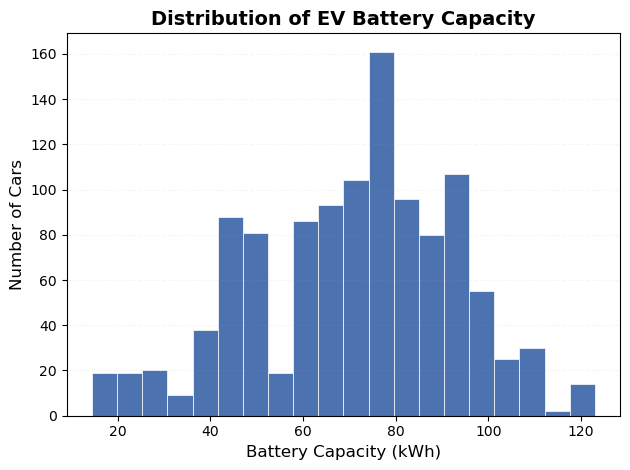

In [101]:
plt.hist(ev_df["Battery_kWh"].dropna(),bins=20,color="#4C72B0",edgecolor="white",linewidth=0.5)
plt.title("Distribution of EV Battery Capacity", fontsize=14, weight="bold")
plt.xlabel("Battery Capacity (kWh)", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.1)
plt.tight_layout()
plt.show()

- Most EVs have battery capacities between 60 and 100 kWh.
- The highest bar (peak) is around 80 kWh, meaning this is the most common battery size among the sampled cars.

#### Q2: Which EV brands have the most models available?
- Reason: Identify dominant manufacturers in the EV market.

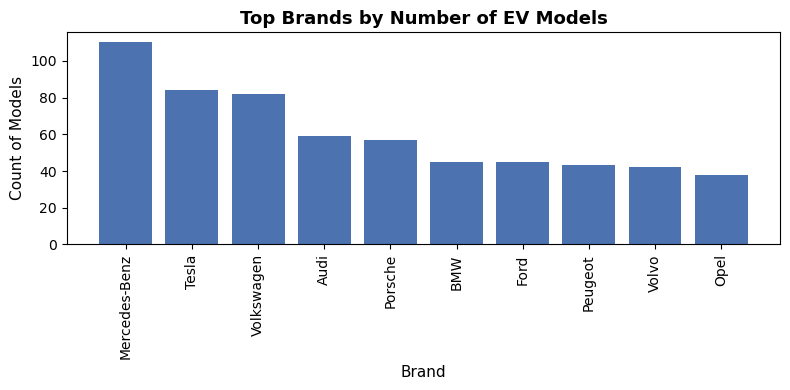

In [102]:
plt.figure(figsize=(8,4))
top_brands = ev_df["Brand"].value_counts().head(10)
bars = plt.bar(top_brands.index, top_brands.values, color="#4C72B0")

plt.title("Top Brands by Number of EV Models", fontsize=13, weight="bold")
plt.xlabel("Brand", fontsize=11)
plt.ylabel("Count of Models", fontsize=11)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Mercedes-Benz has the highest number of EV models.
- There is a clear drop from the leading brands to others, indicating that some brands have invested more heavily in offering a wider EV portfolio.

### 2.Bivariate Analysis

#### Q3: Does battery capacity impact real-world range?
- Reason: Evaluate battery efficiency vs size.

In [103]:
ev_df["Battery_kWh"].corr(ev_df["Range(km)"])

0.900471087925259

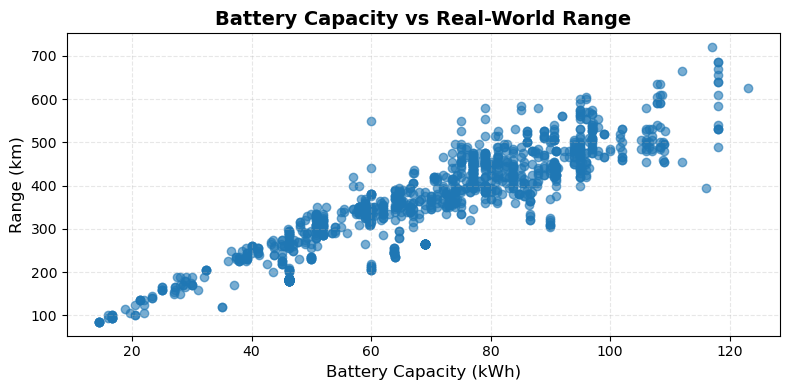

In [104]:
plt.figure(figsize=(8,4))  # wider plot
plt.scatter(
    ev_df["Battery_kWh"],
    ev_df["Range(km)"],
    alpha=0.6)
plt.title("Battery Capacity vs Real-World Range", fontsize=14, weight="bold")
plt.xlabel("Battery Capacity (kWh)", fontsize=12)
plt.ylabel("Range (km)", fontsize=12)

plt.grid(linestyle="--", alpha=0.3)  
plt.tight_layout()
plt.show()

- There is a strong positive correlation between battery capacity and range: As battery capacity increases, the driving range also increases.
- There is some spread/variation at each battery capacity level, indicating other factors (like efficiency, weight, aerodynamics) may influence range, but battery size is a fundamental driver.

#### Q4:How does seating capacity affect real-world range?
- To analyze whether larger seating capacity (6-seater, 7-seater SUVs) reduces real-world range due to higher weight.

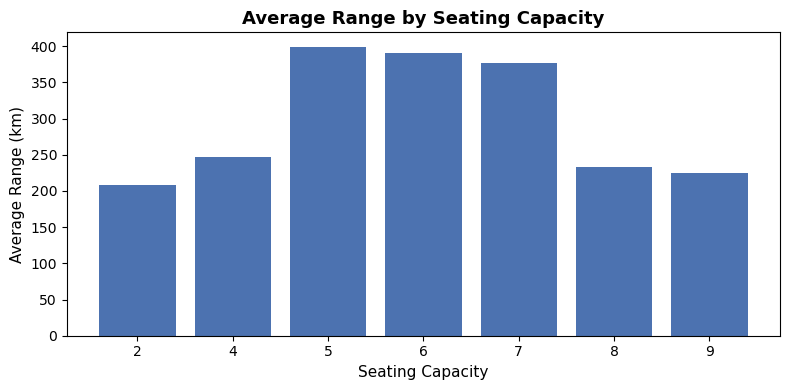

In [105]:
avg_range = ev_df.groupby("Seating_Capacity")["Range(km)"].mean()

plt.figure(figsize=(8,4))
bars = plt.bar(avg_range.index, avg_range.values, color="#4C72B0")

plt.title("Average Range by Seating Capacity", fontsize=13, weight="bold")
plt.xlabel("Seating Capacity", fontsize=11)
plt.ylabel("Average Range (km)", fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- EVs with mid-size seating capacity (5-7) offer the best average range, which is useful for potential buyers and manufacturers targeting efficiency and usability.

### 3.Multivariate Analysis

#### Q5 : How does Market Segment affect Efficiency and Real-World Range?
- Identify which market segment offers the most energy-efficient EVs by comparing real-world range (km) and energy consumption (Wh/km).

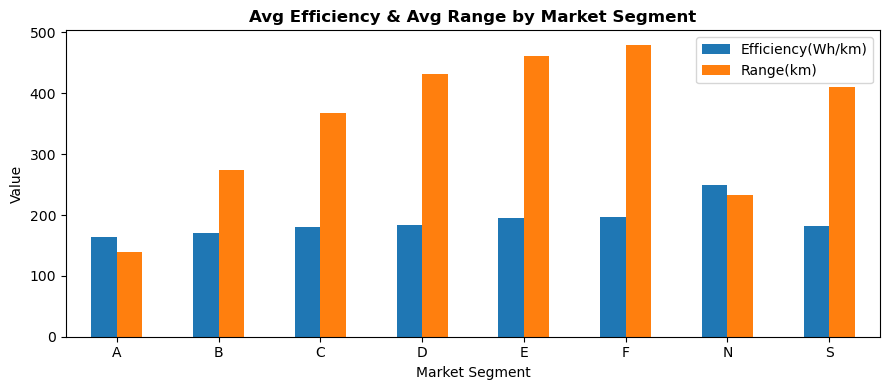

In [106]:
grouped = ev_df.groupby("Market_Segment")[["Efficiency(Wh/km)", "Range(km)"]].mean()
grouped.plot(kind="bar", figsize=(9,4))

plt.title("Avg Efficiency & Avg Range by Market Segment",weight="bold")
plt.xlabel("Market Segment")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Mid-market segments (B/C/D) offer the best trade-off between energy efficiency and driving range, making them the most practical segment for mass consumers.

#### Q6-How does seating capacity influence both driving range and cargo space in EVs?

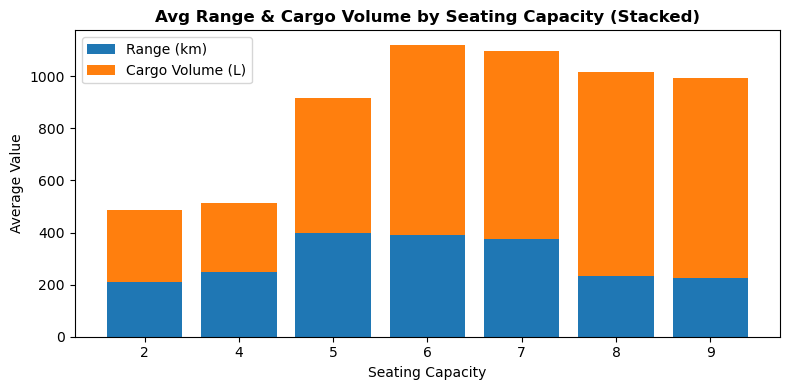

In [107]:
seat_summary = (
    ev_df.groupby("Seating_Capacity")[["Range(km)", "Cargo_volume(L)"]]
         .mean()
         .reset_index()
         .sort_values("Seating_Capacity")
)

plt.figure(figsize=(8,4))
plt.bar(seat_summary["Seating_Capacity"], seat_summary["Range(km)"], label="Range (km)")
plt.bar(seat_summary["Seating_Capacity"], seat_summary["Cargo_volume(L)"], bottom=seat_summary["Range(km)"], label="Cargo Volume (L)")

plt.xlabel("Seating Capacity")
plt.ylabel("Average Value")
plt.title("Avg Range & Cargo Volume by Seating Capacity (Stacked)",weight="bold")
plt.legend()
plt.tight_layout()
plt.show()

- Going from small (2–4 seats) to mid-size (5–7) brings substantial increases in both range and cargo. Moving to larger vehicles (8–9 seats) prioritizes cargo volume, but range no longer improves—likely due to weight and battery size trade-offs. This helps visualize the practicality and utility balance across different EV capacities.

In [108]:
numeric_cols = ev_df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Range(km)', 'Long_distance_range(km)', 'Battery_kWh', 'Weight(kg)',
       'Acceleration(0-100s)', 'Efficiency(Wh/km)', 'Fastcharge_power(kW)',
       'Cargo_volume(L)', 'Price_per_range', 'Price(£)', 'Range_per_kWh',
       'Charging_km_per_min', 'Price_per_kWh'],
      dtype='object')


In [109]:
import plotly.express as px
cols = ['Range(km)', 'Battery_kWh', 'Efficiency(Wh/km)', 'Weight(kg)', 'Price(£)','Price_per_kWh','Long_distance_range(km)']

corr = ev_df[cols].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu",
    title="<b>EV Performance & Pricing Correlation Analysis</b>",
    width=1000,
    height=700
)

fig.update_layout(
    font=dict(size=14),
    title_x=0.5
)

fig.show()

- EVs with bigger batteries achieve higher range and command higher price, but added weight reduces efficiency.

 - This summarizes the three strongest relationships shown in the heatmap:

 - Battery size → 🚗 + Range (strong positive correlation)

 - Battery size → 💰 + Price (positive correlation)

 - Weight → ⛽ Higher energy use (negative correlation with efficiency)